In [1]:
!mkdir project


In [2]:
# !gdown -O model.zip --id 1E-csmnsn4xfqYG38-JzAZJw2guUYF6yx
!pip install gdown
!gdown -O data.zip  --id 1zxtdEpdYufK8aKFQszqIUGyVAmi20dkc


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zxtdEpdYufK8aKFQszqIUGyVAmi20dkc
To: /content/data.zip
100% 311M/311M [00:09<00:00, 34.0MB/s]


In [3]:
!unzip data.zip

Archive:  data.zip
   creating: content/CoCodata/
   creating: content/CoCodata/labels/
   creating: content/CoCodata/labels/val/
  inflating: content/CoCodata/labels/val/searchable795_0.txt  
  inflating: content/CoCodata/labels/val/searchable711_7.txt  
  inflating: content/CoCodata/labels/val/scanned312_18.txt  
  inflating: content/CoCodata/labels/val/scanned341_34.txt  
  inflating: content/CoCodata/labels/val/scanned312_29.txt  
  inflating: content/CoCodata/labels/val/scanned338_9.txt  
  inflating: content/CoCodata/labels/val/scanned367_8.txt  
  inflating: content/CoCodata/labels/val/scanned308_9.txt  
  inflating: content/CoCodata/labels/val/searchable693_3.txt  
  inflating: content/CoCodata/labels/val/scanned310_8.txt  
  inflating: content/CoCodata/labels/val/scanned351_10.txt  
  inflating: content/CoCodata/labels/val/searchable799_3.txt  
  inflating: content/CoCodata/labels/val/scanned338_4.txt  
  inflating: content/CoCodata/labels/val/searchable856_0.txt  
  inflating

In [4]:
%cd project

/content/project


# **ENV**

In [5]:
%cd /content/project

/content/project


## pip

In [7]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## config

In [14]:
#write config
#@title create custom_data.yaml config
path = "custom_data.yaml"
with open(path, "w") as f:
    cf = """   
path: /content/project/CoCodata
train: images/train
val:  images/val
test: #images/test

# number of classes
nc: 8

# class names
names: 
    0: heading
    1: question
    2: subquestion
    3: choice
    4: image
    5: table
    6: blank
    7: auxillary_text
    """
    # "heading": 0,  # person
    # "question": 1,  # bicycle
    # "subquestion": 2,
    # "choice"  : 3,
    # "image"   : 4,
    # "table"   : 5,
    # "blank"   : 6,
    # "auxillary_text"   : 7,

    f.write(cf)

# **TRain**

In [9]:
!export CUDA_VISIBLE_DEVICES=0

In [10]:
import torch 
torch.cuda.is_available()

True

In [12]:
!rm -rf /content/project/smartjen

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8x.yaml') # build from YAML and transfer weights
# model = YOLO('yolov8L.pt')  # build from YAML and transfer weights

# Train the model
model.train(data='custom_data.yaml', epochs=80, imgsz=(640, 640),
            project="smartjen", verbose=True,
            workers=2, device="0", save_period=10, batch=8) #w, h or one int
# model.train(data='coco128.yaml', epochs=20, imgsz=634,
#             project="smartjen", verbose=True,
#             workers=2, device="cpu", save_period=5) #w, h or one int



                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640

# TEST

In [ ]:
!gdown -O yolov8x.pt --id 1DJwHz4HwPuRCPfVFEfSbQ45lL46JwWw7

In [ ]:
# !gdown -O data.zip --id 13lgLGcCQXv9bo2z-ZBjSmC_AZoGLh2XX #scanned file
!gdown -O datav2.zip --id 1DYOMqWhEP_RV1NymPE3b7dXuneAjC7yp  #unsearchable - color
!gdown -O datav3.zip --id 1Lg--KBEFK4GBTEg2o-Ql9nDmh8guKBtw #searchable

In [ ]:
!unzip datav2.zip
!unzip datav3.zip

In [ ]:
from ultralytics import YOLO

In [ ]:
#write config
#@title create custom_data.yaml config
path = "custom_data.yaml"
with open(path, "w") as f:
    cf = """   
path: /content/content/questdata-v3
train: images/train
val:  images/test
# test: images/test

# number of classes
nc: 8

# class names
names: 
    0: heading
    1: question
    2: subquestion
    3: choice
    4: image
    5: table
    6: blank
    7: auxillary_text
    """
    # "heading": 0,  # person
    # "question": 1,  # bicycle
    # "subquestion": 2,
    # "choice"  : 3,
    # "image"   : 4,
    # "table"   : 5,
    # "blank"   : 6,
    # "auxillary_text"   : 7,

    f.write(cf)

In [ ]:
!rm -rf /content/runs

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/project/smartjen/train2/weights/best.pt')  # build from YAML and transfer weights
metrics = model.val(data="custom_data.yaml", device="cpu", imgsz=(640, 640), conf=0.5)

WARNING ⚠️ updating to 'imgsz=640'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics YOLOv8.0.104 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
YOLOv8x summary (fused): 268 layers, 68131272 parameters, 0 gradients
val: Scanning /content/project/CoCodata/labels/test.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [02:27<00:00, 49.14s/it]
                   all         40        383      0.749       0.53      0.653      0.556
               heading         40         10          0          0          0          0
              question         40        126      0.854      0.651      0.773      0.615
           subquestion         40         77      0.875      0.455      0.687      0.498
                choice   

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/yolov8x.pt')
import time
import os
os.environ['CUDA_VISIBLE_DEVICES']= "0"
st = time.time()
source = '/content/small_test/low_quality_+_outlier674_13.png'
source = "/content/small_test/low_quality183_0.png"
# source = "/content/small_test/sanned+more_ourlier299_0.png"
# source = "/content/small_test/searchable846_18.png"
# source = "/content/small_test/searchable843_1.png"
source = "/content/small_test/searchable837_6.png"
detection_results = model.predict(source, save=True, imgsz=(800, 800), conf=0.5, device="cpu")
print(time.time()-st)


image 1/1 /content/small_test/searchable837_6.png: 800x576 4 subquestions, 2 images, 4389.5ms
Speed: 5.9ms preprocess, 4389.5ms inference, 0.9ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict9


5.912635326385498


WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[1.6269e+02, 8.7593e+02, 5.2759e+02, 1.1931e+03, 9.3773e-01, 4.0000e+00]])
cls: tensor([4.])
conf: tensor([0.9377])
data: tensor([[1.6269e+02, 8.7593e+02, 5.2759e+02, 1.1931e+03, 9.3773e-01, 4.0000e+00]])
id: None
is_track: False
orig_shape: tensor([1685, 1191])
shape: torch.Size([1, 6])
xywh: tensor([[ 345.1416, 1034.5315,  364.8934,  317.1937]])
xywhn: tensor([[0.2898, 0.6140, 0.3064, 0.1882]])
xyxy: tensor([[ 162.6949,  875.9346,  527.5883, 1193.1283]])
xyxyn: tensor([[0.1366, 0.5198, 0.4430, 0.7081]])


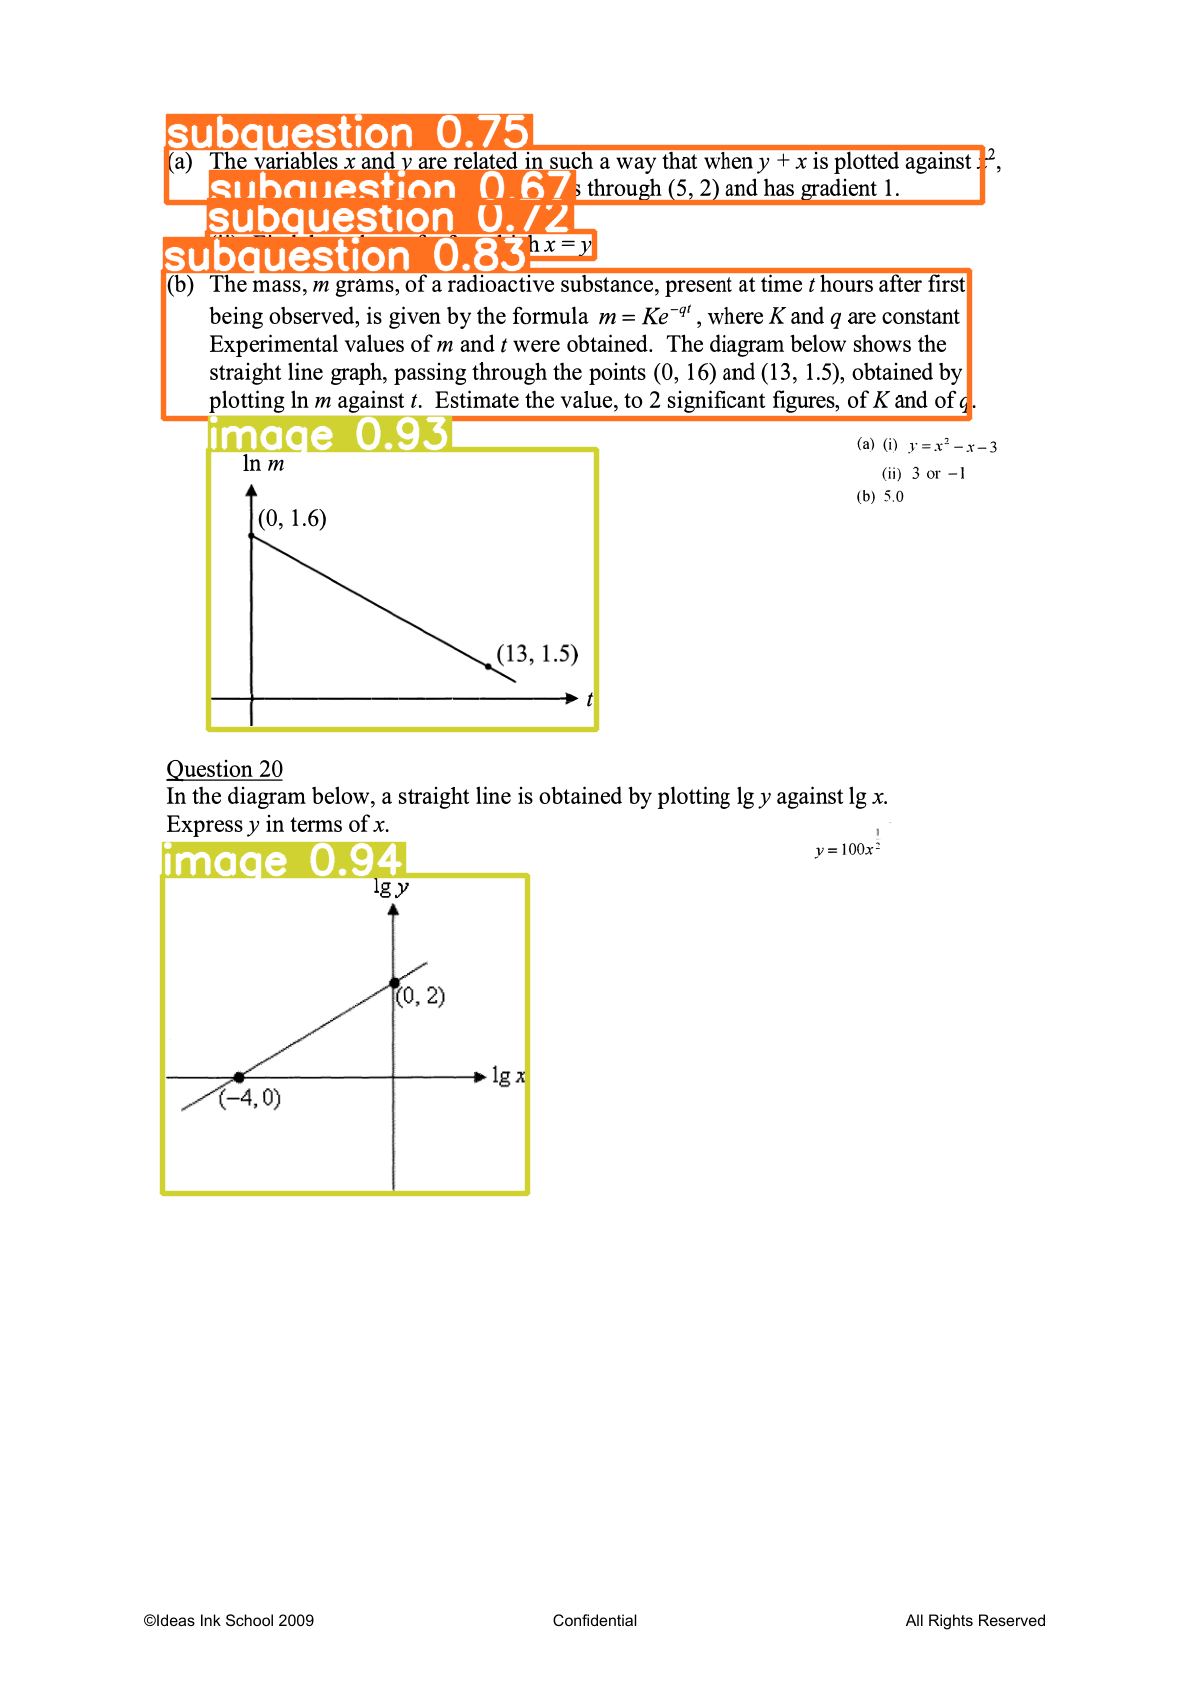

In [ ]:
#@title plot for example
import cv2
from IPython.display import display, Image
for x in detection_results:
    boxes = x.boxes
    masks = x.masks
    probs = x.probs
    print(boxes[0])
    annotated_frame = detection_results[0].plot()

    # Display the annotated frame
    _, encoded_img = cv2.imencode('.png', annotated_frame)
    img_bytes = encoded_img.tobytes()
    display(Image(img_bytes))
    # cv2.imshow("YOLOv8 Inference", annotated_frame)
    break

# EXPORT

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/ultralytics.git

In [ ]:
model.export(format='onnx', opset=12)

In [ ]:
!yolo export model="/content/project/smartjen/train2/weights/best.pt" format=onnx opset=12

In [ ]:
!cp /content/project/runs/detect/val7 val.zip